### Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CZ4079\ FYP/Analysis

/content/drive/MyDrive/CZ4079 FYP/Analysis


In [ ]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

### Load data

In [ ]:
dex_df = pd.read_excel('data/aggregator_dex_new_users.xlsx')
eth_df = pd.read_excel('data/eth_prices.xlsx')

aggregator_new_users = dex_df['Aggregator']
dex_new_users = dex_df['Standard DEX']
eth_prices = eth_df['Price']

### Correlation between ETH Prices & new aggregator users

In [ ]:
# Calculate the Pearson correlation coefficient
corr = aggregator_new_users.corr(eth_prices, method='pearson')

print(corr)

0.9441682639105665


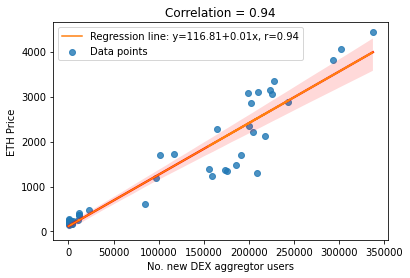

In [ ]:
df = pd.concat([aggregator_new_users, eth_prices], axis=1, join='inner')

# Regression line statistics
x, y = aggregator_new_users, eth_prices
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig, ax = plt.subplots()

# Create a scatter plot
sns.regplot(x='Aggregator', y='Price', data=df, line_kws={"color": "red"}, ax=ax, label='Data points')
ax.plot(x, intercept + slope * x, label=line)

# Set labels
ax.set_xlabel('No. new DEX aggregtor users')
ax.set_ylabel('ETH Price')

plt.title(f'Correlation = {corr:.2f}')
plt.legend(fontsize=10)
plt.show()

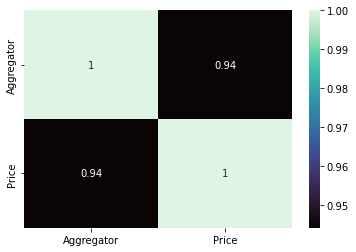

In [ ]:
# create a heatmap to show the correlation matrix
sns.heatmap(df.corr(), cmap='mako', annot=True)
plt.show()

### Correlation between DEX & ETH Prices

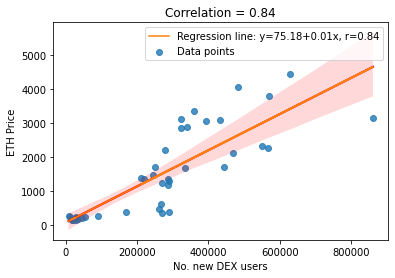

In [ ]:
df = pd.concat([dex_new_users, eth_prices], axis=1, join='inner')

# Regression line statistics
x, y = dex_new_users, eth_prices
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig, ax = plt.subplots()

# Create a scatter plot
sns.regplot(x='Standard DEX', y='Price', data=df, line_kws={"color": "red"}, ax=ax, label='Data points')
ax.plot(x, intercept + slope * x, label=line)

# Set labels
ax.set_xlabel('No. new DEX users')
ax.set_ylabel('ETH Price')

corr = dex_new_users.corr(eth_prices, method='pearson')
plt.title(f'Correlation = {corr:.2f}')
plt.legend(fontsize=10)
plt.show()

### Correlation between Aggregator & DEX users

In [ ]:
# Calculate the Pearson correlation coefficient
corr = aggregator_new_users.corr(dex_new_users, method='pearson')

print(corr)

0.8130393099937524


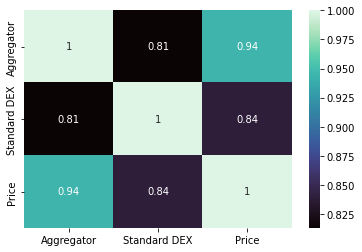

In [ ]:
df = pd.concat([aggregator_new_users, dex_new_users, eth_prices], axis=1, join='inner')

# create a heatmap to show the correlation matrix
sns.heatmap(df.corr(), cmap='mako', annot=True)
plt.show()